<a href="https://colab.research.google.com/github/shrikantha/Anagram1/blob/master/10_26_23_Shree_MiniProject_2_Structured_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project Notebook: Structured Data Classification

## Problem Statement

To predict whether a patient has a heart disease.

## Learning Objectives

At the end of the experiment, you will be able to

* Understand the Cleveland Clinic Foundation Heart Disease dataset
* Pre-process this dataset using Keras layers: IntegerLookup, StringLookup & Normalization
* Understand and use Keras concatenate layer
* Build a neural network model and architecture using Keras functional api
* Predict an unseen data

## Introduction

This example demonstrates how to do structured data classification, starting from a raw
CSV file. Our data includes both numerical and categorical features. We will use Keras
preprocessing layers to normalize the numerical features and vectorize the categorical
ones.

Note that this example should be run with TensorFlow 2.5 or higher.

## Dataset

[Our dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) is provided by the
Cleveland Clinic Foundation for Heart Disease.
It's a CSV file with 303 rows. Each row contains information about a patient (a
**sample**), and each column describes an attribute of the patient (a **feature**). We
use the features to predict whether a patient has a heart disease (**binary
classification**).

Here's the description of each feature:
<br><br>

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

<br><br>

In [3]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/heart.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Import Required Packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup     # Used in Feature processing
from tensorflow.keras.layers import Normalization     # Used in Feature processing
from tensorflow.keras.layers import StringLookup      # Used in Feature processing
from tensorflow.keras.layers.experimental import preprocessing

# Part A

## Load the data and create batches [2 Marks]

### Load data into a Pandas dataframe

Hint:: pd.read_csv

In [ ]:
file_url = "/content/heart.csv"
## YOUR CODE HERE

import pandas as pd



# Load the data into a Pandas DataFrame
df = pd.read_csv(file_url)

Check the shape of the dataset:

In [ ]:
## YOUR CODE HERE

# Check the shape of the dataset
shape = df.shape

# Print the shape
print("Shape of the dataset:", shape)

Shape of the dataset: (303, 14)


Check the preview of a few samples:

Hint:: head()

In [ ]:
## YOUR CODE HERE
# Display the first few rows of the DataFrame
preview = df.head()

# Print the preview
print(preview)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  


It makes sense to check unique values here.

In [ ]:

# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print the unique values
for col, values in unique_values.items():
    print(f"Unique values for {col}: {values}")


Unique values for age: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 51 45 39 68 47 35 29 70 46 77 38 34 74 76 71]
Unique values for sex: [1 0]
Unique values for cp: [1 4 3 2 0]
Unique values for trestbps: [145 160 120 130 140 172 150 110 132 117 135 155 125 104 180 138 108 128
 100 200 124  94 122 170 105 165 112 102 152 115 118 101 126 142 174 134
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Unique values for chol: [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 269 267 248 197 360 258 308 245 270 208 264 321 274 325 235 257 302
 164 231 141 252 255 183 330 222 217 282 288 220 209 227 261 213 174 281
 198 221 205 309 240 289 318 298 265 564 246 322 299 300 293 277 304 214
 207 160 249 394 212 184 315 409 244 305 195 196 273 126 313 259 200 262
 215 228 193 303 271 210 327 149 201 295 306 178 237 218 223 242 319 166
 180 311 278 232 253 

Draw some inference from the data. What does the target column indicate?

The last column, "target", indicates whether the patient has a heart disease (1) or not
(0).

### Split the data into a training and validation set

Hint:: Use .sample() method from Pandas.

Refer to link [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

Official reference from pandas for drop method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
## YOUR CODE HERE
## YOUR CODE HERE
import pandas as pd

# Load your data into a Pandas DataFrame (assuming 'df' contains your data)
# df = pd.read_csv("/content/heart.csv")

# Define the fraction of data to use for validation (e.g., 20%)
validation_fraction = 0.2

# Calculate the number of samples for the validation set
num_validation_samples = int(validation_fraction * len(df))

# Randomly sample the validation set
val_dataframe = df.sample(n=num_validation_samples, random_state=42)

# The remaining data is your training set (excluding the validation samples)
train_dataframe = df.drop(val_dataframe.index)

# Now you have 'training_set' and 'validation_set' DataFrames for training and validation.

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 243 samples for training and 60 for validation


### Converting into tensorflow dataset & creating batches

Generate `tf.data.Dataset` objects for each dataframe:

Each `Dataset` yields a tuple `(input, target)` where `input` is a dictionary of features
and `target` is the value `0` or `1`:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) to create the tuple using tensorflow.

In [ ]:
# Assuming df is your dataframe and target is your target column
train_target = train_dataframe.pop('target')
train_ds = tf.data.Dataset.from_tensor_slices((dict(train_dataframe), train_target))
validation_target = val_dataframe.pop('target')
validation_ds = tf.data.Dataset.from_tensor_slices((dict(val_dataframe), validation_target))



In [ ]:
def visualize_dataset(dataset):
    for features, label in dataset.take(1):
        print("Features:")
        for key, value in features.items():
            print(f"{key}: {value}")
        print("\nLabels:\n", label)

visualize_dataset(train_ds)



Features:
age: 63
sex: 1
cp: 1
trestbps: 145
chol: 233
fbs: 1
restecg: 2
thalach: 150
exang: 0
oldpeak: 2.3
slope: 3
ca: 0
thal: b'fixed'

Labels:
 tf.Tensor(0, shape=(), dtype=int64)


<ipython-input-133-7e115483f05a>:32: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


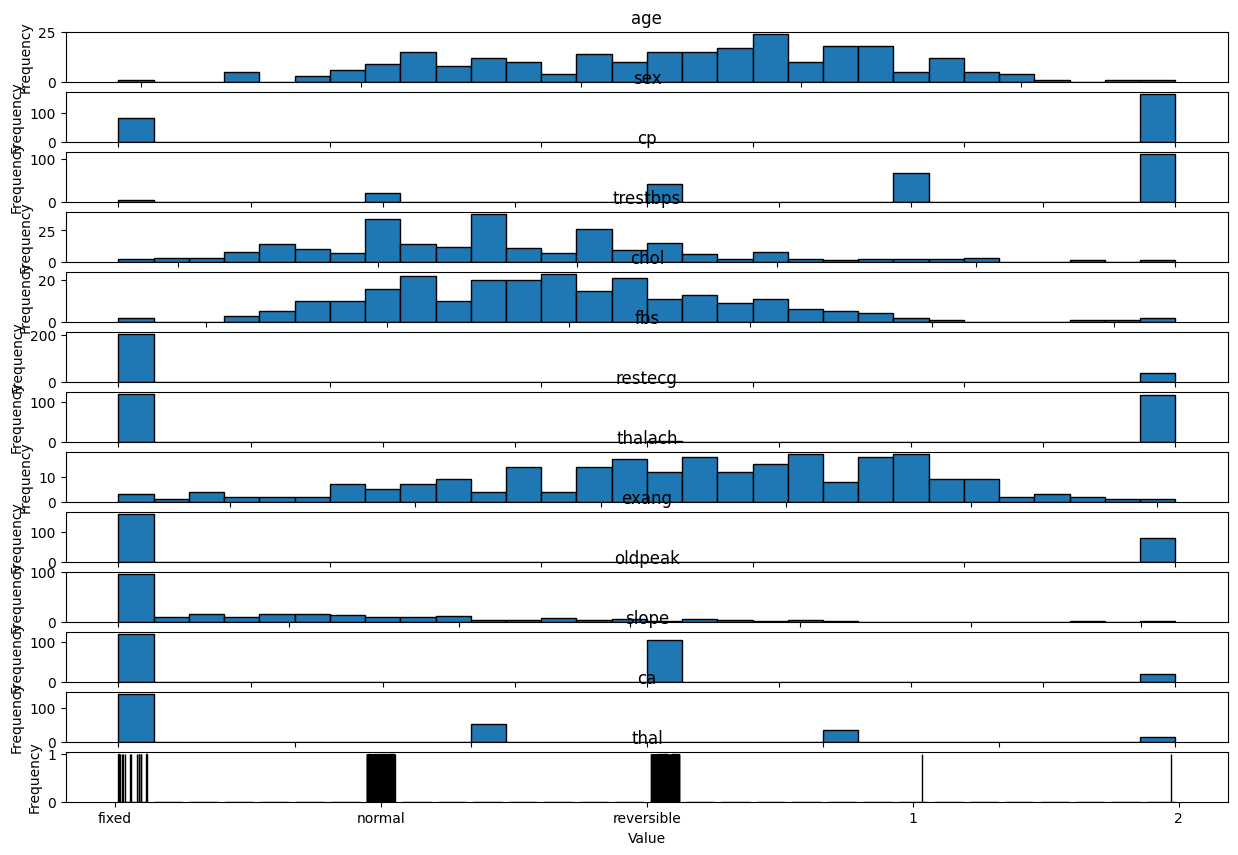

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(dataset, feature_names):
    """
    Plots histograms for each feature in the dataset.

    Parameters:
    - dataset: a tf.data.Dataset object.
    - feature_names: a list of feature names present in the dataset.
    """
    plt.figure(figsize=(15, 10))

    for idx, feature_name in enumerate(feature_names, 1):
        all_values = []

        for features, _ in dataset:
            feature_data = features[feature_name].numpy()

            # Ensure feature_data is iterable
            if np.isscalar(feature_data):
                feature_data = [feature_data]

            all_values.extend(feature_data)

        plt.subplot(len(feature_names), 1, idx)
        plt.hist(all_values, bins=30, edgecolor='k')
        plt.title(feature_name)
        plt.xlabel("Value")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Usage example:
# Assuming 'train_ds' is your dataset and 'feature_list' is a list of feature names in the dataset.
# plot_histograms(train_ds, feature_list)

feature_list = ["age","sex", "cp" , "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

plot_histograms(train_ds, feature_list)



#### Create the batch of the datasets:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) to create a batch using tensorflow.

In [ ]:
## YOUR CODE HERE  ## For train

# Define the batch size
batch_size = 30  # You can adjust this based on your needs

# Create batches using the batch method
train_batches = train_ds.batch(batch_size)

## YOUR CODE HERE  ## For val
val_batches = validation_ds.batch(batch_size)

## Feature preprocessing with Keras layers [3 Marks]

### Categorical Features Encoding

The following features are categorical features encoded as integers:

- `sex`
- `cp`
- `fbs`
- `restecg`
- `exang`
- `ca`

In [ ]:
print (df['sex'])

0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    0
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64


We will encode these features using **one-hot encoding**. We have two options
here:

 - Use `CategoryEncoding()`, which requires knowing the range of input values
 and will throw an error on input outside the range.
 - Use `IntegerLookup()` which will build a lookup table for inputs and **reserve
 an output index for unkown input values**.

For this example, we want a simple solution that will handle out of range inputs
at inference, so we will use `IntegerLookup()`.

We also have a categorical feature encoded as a string: `thal`. We will create an
index of all possible features and encode output using the `StringLookup()` layer.

Create a function `encode_categorical_feature`, this function takes four parameters.
1. Feature to be encoded.
2. Name of the feature in the dataset.
3. Dataset containing the feature.
4. A boolean value wether the feature is string or not.

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

def encode_categorical_feature(feature_name, dataset, is_string=False):
    """
    Encode a categorical feature using one-hot encoding.

    Parameters:
    - feature_name: Name of the feature.
    - dataset: The tensorflow Dataset containing the feature and target.
    - is_string: Boolean indicating if the feature is a string.

    Returns:
    - One-hot encoded feature layer.
    """

    if is_string:
        index = preprocessing.StringLookup()
    else:
        index = preprocessing.IntegerLookup(max_tokens=None)

    # Extract the specific feature from the dataset
    feature_dataset = dataset.map(lambda x, y: x[feature_name])
    index.adapt(feature_dataset)

    # Determine the number of unique categories
    num_tokens = len(index.get_vocabulary())

    encoder = preprocessing.CategoryEncoding(num_tokens=num_tokens, output_mode="binary")

    # Instead of adapting the encoder, just return the composed layer
    return lambda feature: encoder(index(feature))

# Usage example
# Assuming you have train_ds created from the DataFrame without converting to Pandas series
sex_encoded = encode_categorical_feature('sex', train_ds)


In [ ]:
print(df['sex'])

0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    0
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64


In [ ]:
# Take one batch of data from train_ds
for features, labels in train_ds.take(5):
    # Extract 'sex' feature
    sex_feature = features['sex']

    # Apply the encoding function
    encoded_sex = sex_encoded(sex_feature)

    # Print the result
    print(encoded_sex.numpy())


[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]


In [ ]:
num_batches = 0
for _ in train_ds:
    num_batches += 1
print(num_batches)


243


**Refer :** StringLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup) and IntegerLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/IntegerLookup).

### Numerical features Normalization
The following feature are continuous numerical features:

- `age`
- `trestbps`
- `chol`
- `thalach`
- `oldpeak`
- `slope`

For each of these features, we will use a `Normalization()` layer to make sure the mean
of each feature is 0 and its standard deviation is 1.


- Define a function `encode_numerical_feature` to apply featurewise normalization to numerical features.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

def encode_numerical_feature(feature_name, dataset):
    """
    Normalizes a numerical feature to have mean 0 and standard deviation 1.

    Args:
    - feature_name (str): The name of the feature.
    - dataset (tf.data.Dataset): The dataset containing the feature.

    Returns:
    - Normalized feature (tf.Tensor).
    """

    # Create a Normalization layer for our feature
    normalizer = preprocessing.Normalization(axis=None)

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[feature_name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the feature (this line will be called during model training)
    encoded_feature = normalizer

    return encoded_feature

# Usage example:
# Assuming you have train_ds which is a tf.data.Dataset
age_normalized = encode_numerical_feature('age', train_ds)


Refer Normalization [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization)

In [ ]:
# Example usage for 'age'
normalized_age = encode_numerical_feature('age', train_ds)

# Example usage for 'trestbps'
normalized_trestbps = encode_numerical_feature('trestbps', train_ds)




# Repeat for other continuous numerical features

normalized_chol = encode_numerical_feature('chol', train_ds)
normalized_thalach = encode_numerical_feature('thalach', train_ds)
normalized_oldpeak = encode_numerical_feature('oldpeak', train_ds)
normalized_slope = encode_numerical_feature('slope', train_ds)


# Part B

## Building the model [4 Marks]

#### Need to instantiate a Keras tensor for all features
 Use keras Input() [method](https://keras.io/api/layers/core_layers/input/).
* Create a list of inputs to be fed to the model.
* This list consists of the features output from keras Input() method.
* These inputs include all the features.


In [ ]:
from keras.layers import Input

# Categorical features encoded as integers
# Assuming each categorical feature is encoded as a single integer, hence shape is (1,)
sex = Input(shape=(1,), name='sex')
cp = Input(shape=(1,), name='cp')
fbs = Input(shape=(1,), name='fbs')
restecg = Input(shape=(1,), name='restecg')
exang = Input(shape=(1,), name='exang')
ca = Input(shape=(1,), name='ca')
thal = Input(shape=(1,), name='thal')

# Numerical features
# Each numerical feature is a single scalar value, hence shape is (1,)
age = Input(shape=(1,), name='age')
trestbps = Input(shape=(1,), name='trestbps')
chol = Input(shape=(1,), name='chol')
thalach = Input(shape=(1,), name='thalach')
oldpeak = Input(shape=(1,), name='oldpeak')
slope = Input(shape=(1,), name='slope')

# List of all input tensors
all_inputs = [sex, cp, fbs, restecg, exang, ca, thal, age, trestbps, chol, thalach, oldpeak, slope]


### Encoding above features
Use  "encode_categorical_feature" & "encode_numerical_feature" function on respective features that we defined above.

In [ ]:


# Categorical features
sex_encoded = encode_categorical_feature('sex', train_ds)
sex_encoded_tensor = sex_encoded(sex)
cp_encoded = encode_categorical_feature('cp', train_ds)
cp_encoded_tensor = cp_encoded(cp)

fbs_encoded = encode_categorical_feature('fbs', train_ds)
fbs_encoded_tensor = fbs_encoded(fbs)
restecg_encoded = encode_categorical_feature('restecg', train_ds)
restecg_encoded_tensor = restecg_encoded(restecg)

#exang_encoded = encode_categorical_feature('exang', train_ds,is_string=True)
ca_encoded = encode_categorical_feature( 'ca', train_ds)
ca_encoded_tensor = ca_encoded(ca)
thal_encoded = encode_categorical_feature('thal', train_ds, is_string=True)
thal_encoded_tensor = thal_encoded(thal)



# Numerical features
age_encoded = encode_numerical_feature('age', train_ds)
age_encoded_tensor = age_encoded(age)
#age_encoded = encode_numerical_feature('age', train_ds)
#age_encoded = encode_numerical_feature('age', train_ds)
#age_encoded = encode
trestbps_encoded = encode_numerical_feature('trestbps', train_ds)
trestbps_encoded_tensor = trestbps_encoded(trestbps)
#trestbps_encoded = encode_numerical_feature('trestbps', train_ds)
#trestbps_encoded = encode_numerical_feature('trestbps'
chol_encoded = encode_numerical_feature('chol', train_ds)
chol_encoded_tensor = chol_encoded(chol)
#chol_encoded = encode_numerical_feature('chol', train_ds)
#chol_encoded = encode_numerical_feature('chol', train_ds)
#chol_encoded = encode
thalach_encoded = encode_numerical_feature( 'thalach', train_ds)
thalach_encoded_tensor = thalach_encoded(thalach)
#thalach_encoded = encode_numerical_feature('thalach', train_ds)
#thalach_encoded = encode_numerical_feature('thalach', train_ds)
oldpeak_encoded = encode_numerical_feature( 'oldpeak', train_ds)
oldpeak_encoded_tensor = oldpeak_encoded(oldpeak)
#oldpeak_encoded = encode_numerical_feature('oldpeak', train_ds)
#oldpeak_encoded = encode_numerical_feature('oldpeak', train_ds)
slope_encoded = encode_numerical_feature('slope', train_ds)
slope_encoded_tensor = slope_encoded(slope)
#slope_encoded = encode_numerical_feature('slope', train_ds)
#slope_encoded = encode_numerical_feature('slope', train_ds)
#slope_encoded = encode

# List of all encoded input tensors
#all_encoded_inputs = [sex_encoded, cp_encoded, fbs_encoded, restecg_encoded,  ca_encoded, thal_encoded, age_encoded, trestbps_encoded, chol_encoded, thalach_encoded, oldpeak_encoded, slope_encoded]
all_encoded_inputs = [sex_encoded_tensor, cp_encoded_tensor, fbs_encoded_tensor, restecg_encoded_tensor, exang, ca_encoded_tensor, thal_encoded_tensor, age_encoded_tensor, trestbps_encoded_tensor, chol_encoded_tensor, thalach_encoded_tensor, oldpeak_encoded_tensor, slope_encoded_tensor]





##### Understanding the result of  encoder functions

### Using Functional API for building model
Build the three model architectures with 1, 2, and 3 hidden layers having different numbers of neurons. Train for each architecture and compare the train and the validation accuracy.

* These inputs will be passed to keras.model.
* Concatenate the encoded features using layers.concatenate()
* Add the Dense layers and compile the model.

In [ ]:
for tensor in all_encoded_inputs:
    print(tensor.shape)


(None, 3)
(None, 6)
(None, 3)
(None, 4)
(None, 1)
(None, 5)
(None, 6)
(None, 1)
(None, 1)
(None, 1)
(None, 1)
(None, 1)
(None, 1)


Concatenate Encoded Inputs

In [ ]:
from keras.layers import Concatenate

x = Concatenate()(all_encoded_inputs)


Build Model Layers

In [ ]:
from keras.layers import Dense, Dropout

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)


Build Output Layer

In [ ]:
from keras.layers import Dense

output_layer = Dense(1, activation='sigmoid')(x)


Define the model

In [ ]:
from keras.models import Model

model = Model(inputs=all_inputs, outputs=output_layer)


Compile the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model Summary

In [ ]:
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 restecg (InputLayer)        [(None, 1)]                  0         []                            
                                                                                            

### Visualize the connectivity graph using `keras.utils.plot_model`:

In [ ]:
# `rankdir='LR'` is to make the graph horizontal.
## YOUR CODE HERE
!pip install pydot graphviz


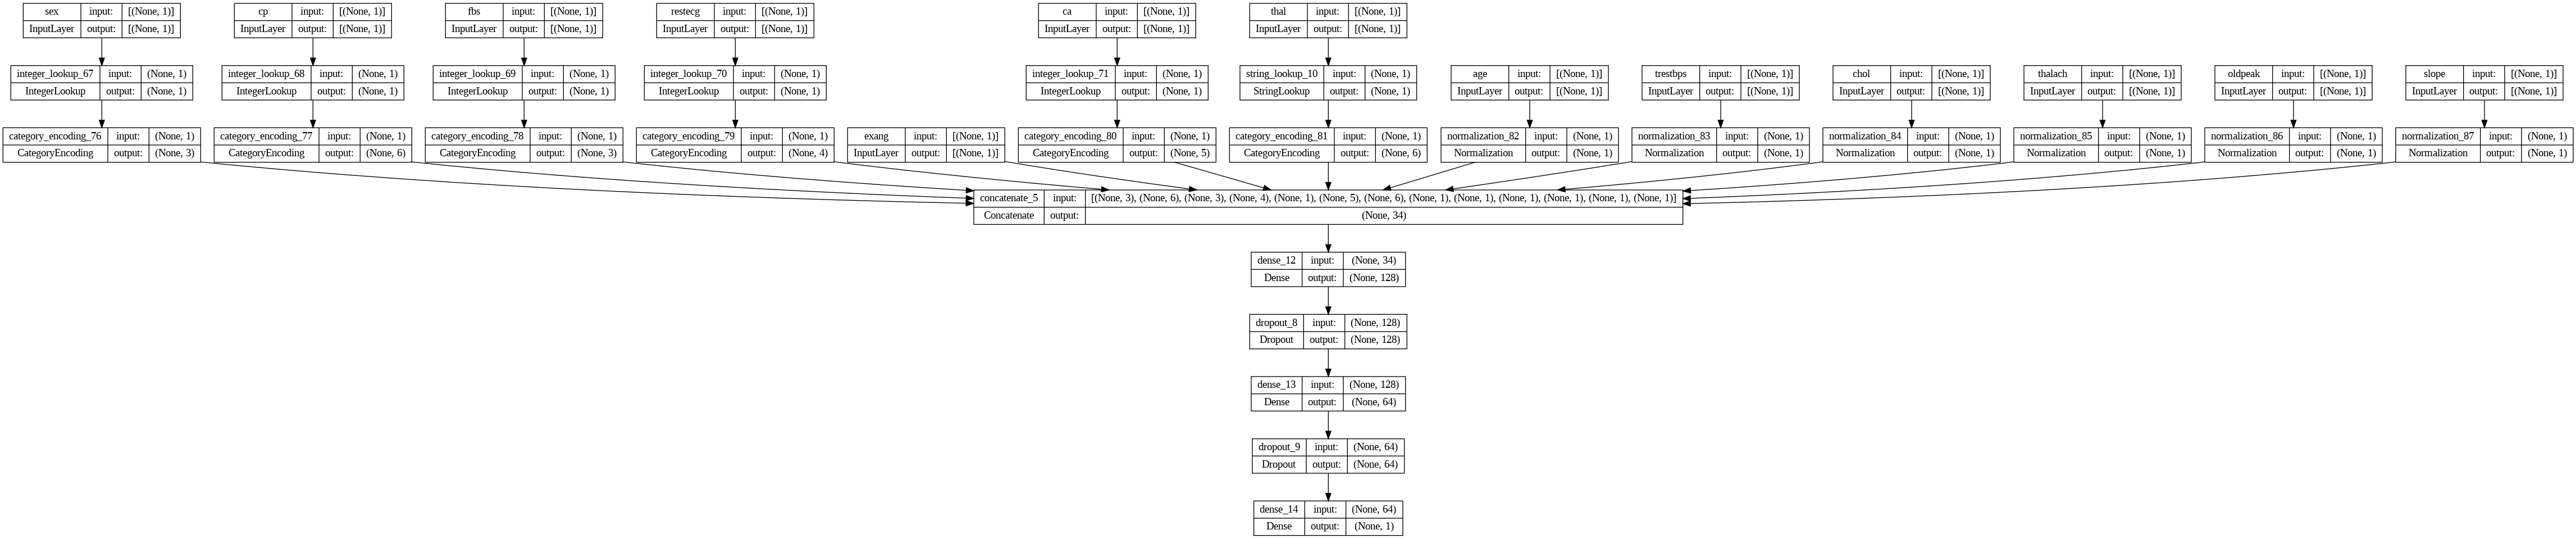

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


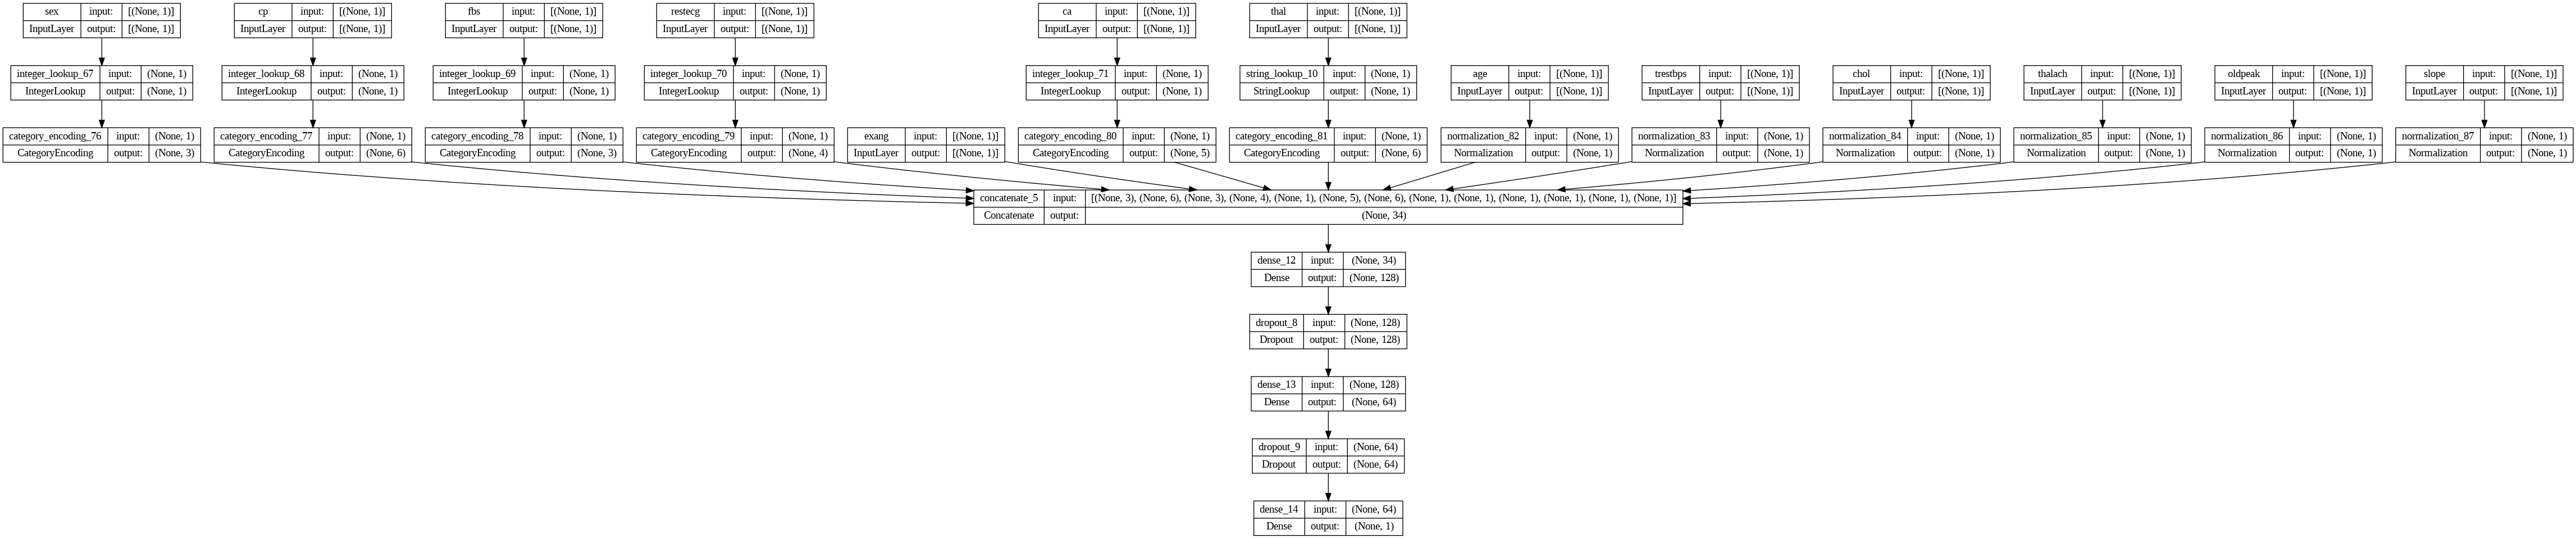

In [ ]:
from IPython.display import Image
Image(filename='model.png')


### Train the model

1. Using Tensors, Normalization and Categorization

In [ ]:
## YOUR CODE HERE

history = model.fit(
    x=train_ds,  # train_ds should yield pairs of (input, target)
    epochs=25,
    batch_size=32,
    verbose=1
    # No need for y argument
)



Epoch 1/25


ValueError: ignored

Method B: Not using Tensors. This section is completely self contained. This is for comparison.

In [31]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [32]:
file_url = "/content/heart.csv"
## YOUR CODE HERE

import pandas as pd



# Load the data into a Pandas DataFrame
df = pd.read_csv(file_url)

In [33]:
X = pd.get_dummies(df.drop(['target'], axis=1))
y = df['target']

In [34]:
X.shape

(303, 17)

In [35]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0,1,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,0,0,1,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,0,0,0,0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0,0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0,0,1,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [37]:
y_train.head()

258    0
61     1
241    1
302    1
118    1
Name: target, dtype: int64

In [38]:

#Build
input_layer = layers.Input(len(X_train.columns))

#Further
# Hidden layer with 64 neurons and ReLU activation
x = layers.Dense(64, activation='relu')(input_layer)

# Another hidden layer with 32 neurons and ReLU activation
x = layers.Dense(32, activation='relu')(x)

# Output layer with a single neuron (for binary classification)
output_layer = layers.Dense(1, activation='sigmoid')(x)

#instantiate
model = Model(inputs=input_layer, outputs=output_layer)


#compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])





In [39]:
#Training
#Train
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 2s 49ms/step - loss: 3.3262 - accuracy: 0.4835 - val_loss: 2.2806 - val_accuracy: 0.5410
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 1.4194 - accuracy: 0.6694 - val_loss: 0.7024 - val_accuracy: 0.6230
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6303 - accuracy: 0.7438 - val_loss: 0.6522 - val_accuracy: 0.6885
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5869 - accuracy: 0.7645 - val_loss: 0.9398 - val_accuracy: 0.6885
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5909 - accuracy: 0.7562 - val_loss: 0.9203 - val_accuracy: 0.6721
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5871 - accuracy: 0.7686 - val_loss: 0.5499 - val_accuracy: 0.7213
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5394 - accuracy: 0.7645 - val_loss: 0.5486 - val_accuracy: 0.7049
Epoch 8/100
8/8 [=====

In [40]:
#Evaluate
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

2/2 [==============================] - 0s 9ms/step


In [41]:
print(y_test)

272    1
238    1
38     1
90     0
106    0
      ..
223    0
29     1
58     0
77     0
19     0
Name: target, Length: 61, dtype: int64


In [42]:
accuracy_score(y_test, y_hat)

0.8360655737704918

## Inference on new data [1 Mark]

To get a prediction for a new sample, you can simply call `model.predict()`. There are
just two things you need to do:

1. wrap scalars into a list so as to have a batch dimension (models only process batches
of data, not single samples)
2. Call `convert_to_tensor` on each feature

Note : The predicted output should be either 0  or 1 based on a threshold value of probability 0.5.

In [ ]:
## YOUR CODE HERE

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

## YOUR CODE HERE